In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('C:\Machine Learning Projects\Cardio_Disease_Vascular\cardio_train.csv',sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\nelli\AppData\Local\Temp\ipykernel_13280\3047365058.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv('C:\Machine Learning Projects\Cardio_Disease_Vascular\cardio_train.csv',sep=';')


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df['age'].unique()

array([22469, 14648, 21901, ..., 14925, 17727, 17926], dtype=int64)

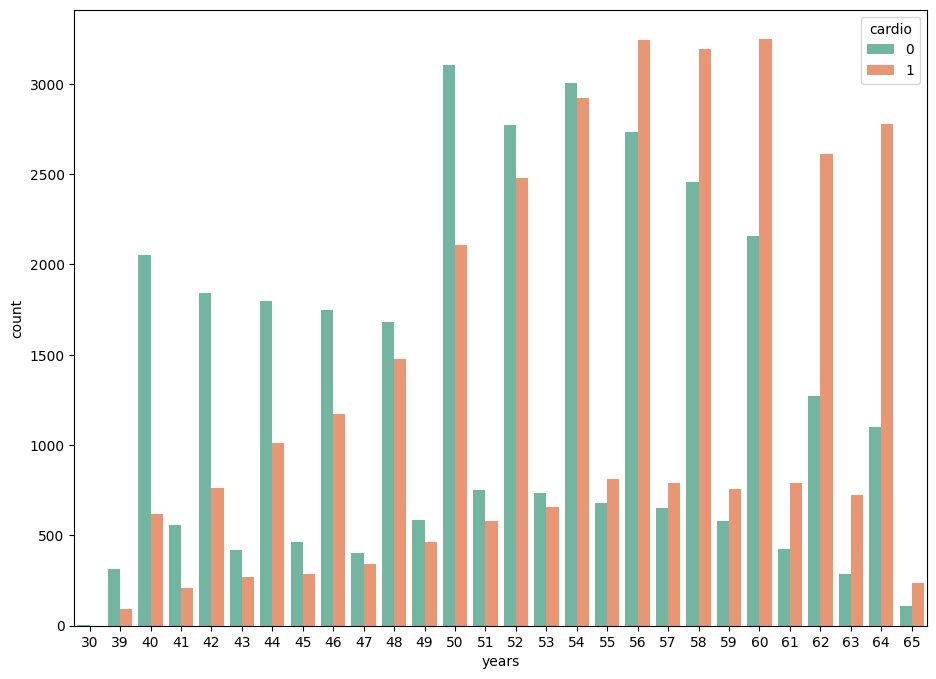

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

In [6]:
df['ap_hi'].unique()

array([  130,   110,   120,   100,   140,   160,   170,   150,   147,
         115,    90,   180,    14,   125,   135,   190,   137,   153,
          11,   145,   148,   126,   105,   220,   119,   141,   165,
         164,    12,   124,   172,   902,   162,   906,   117,   134,
         166,   210,   176,   133,   116,   169,    10,   121,    16,
          80,   112,   159,   122,   113,   118,   200,   155,   142,
         131,   157,   136,   146,   138,  -100,   909,    70,   109,
          85,   106,   129,    93,     7,    95,   179,   161,   156,
         168,   132,   104,   103,   178,   175,   123,   128,   151,
          15,   139, 11500,   127,    17,   108,   144,   158,   102,
           1,  1420,    13,   143,   701,   107,   184,   149,   167,
         114,   101,    60,  1500,   181,   171,   202,  -115,   111,
         907,    20,   188,   185,   163,   173,   154,   177,  -140,
         174,  -120, 14020,  1400,   240,   191,   197,  1620,   152,
          96,   199,

In [7]:
df.shape

(69301, 14)

In [8]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


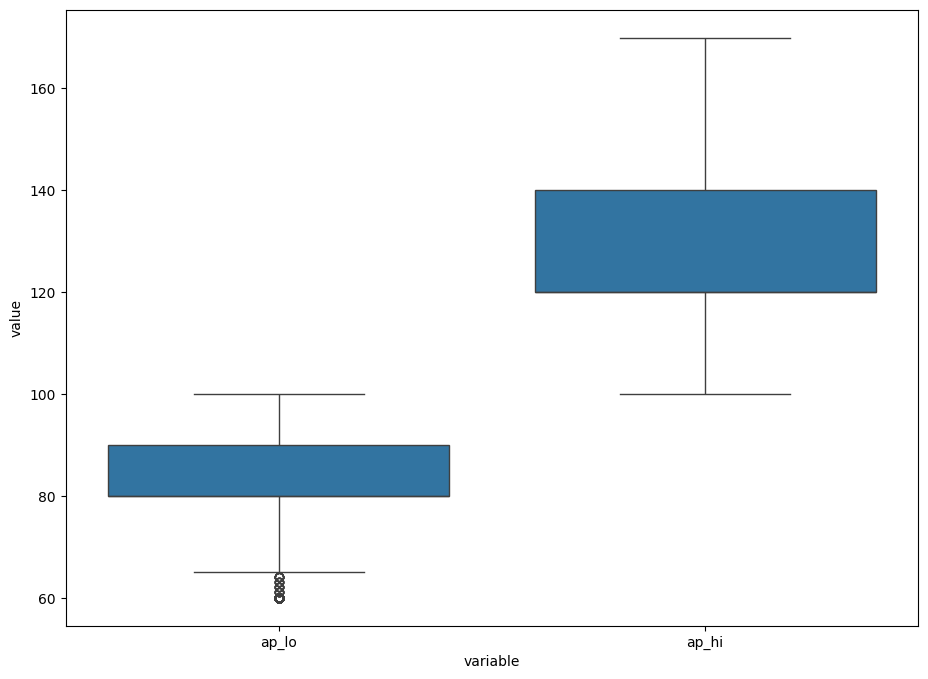

In [9]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [13]:
df['age'] = (df['age']/365.25).round().astype(int)

In [14]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
0,988,62,1,155,69.0,130,80,2,2,0,0,1,0,62
1,989,40,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,60,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,40,2,165,85.0,120,80,1,1,1,1,1,0,40
4,992,64,1,155,62.0,120,80,1,1,0,0,1,0,64


In [15]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'years'],
      dtype='object')

In [16]:
df.drop(columns=['years'],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65535 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           65535 non-null  int64  
 1   age          65535 non-null  int32  
 2   gender       65535 non-null  int64  
 3   height       65535 non-null  int64  
 4   weight       65535 non-null  float64
 5   ap_hi        65535 non-null  int64  
 6   ap_lo        65535 non-null  int64  
 7   cholesterol  65535 non-null  int64  
 8   gluc         65535 non-null  int64  
 9   smoke        65535 non-null  int64  
 10  alco         65535 non-null  int64  
 11  active       65535 non-null  int64  
 12  cardio       65535 non-null  int64  
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65535.0,50475.643412,28571.709334,988.0,25713.0,50522.0,75140.5,99999.0
age,65535.0,53.318944,6.753942,30.0,48.0,54.0,58.0,65.0
gender,65535.0,1.349935,0.476953,1.0,1.0,1.0,2.0,2.0
height,65535.0,164.431281,8.148317,55.0,159.0,165.0,170.0,250.0
weight,65535.0,74.089740,14.113184,11.0,65.0,72.0,82.0,200.0
ap_hi,65535.0,126.248875,14.457877,100.0,120.0,120.0,140.0,170.0
ap_lo,65535.0,81.183200,8.402907,60.0,80.0,80.0,90.0,100.0
cholesterol,65535.0,1.360876,0.677126,1.0,1.0,1.0,1.0,3.0
gluc,65535.0,1.223926,0.570734,1.0,1.0,1.0,1.0,3.0
smoke,65535.0,0.087449,0.282495,0.0,0.0,0.0,0.0,1.0


In [19]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [20]:
df.duplicated().value_counts()

False    65535
Name: count, dtype: int64

In [21]:
df.shape

(65535, 13)

In [22]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

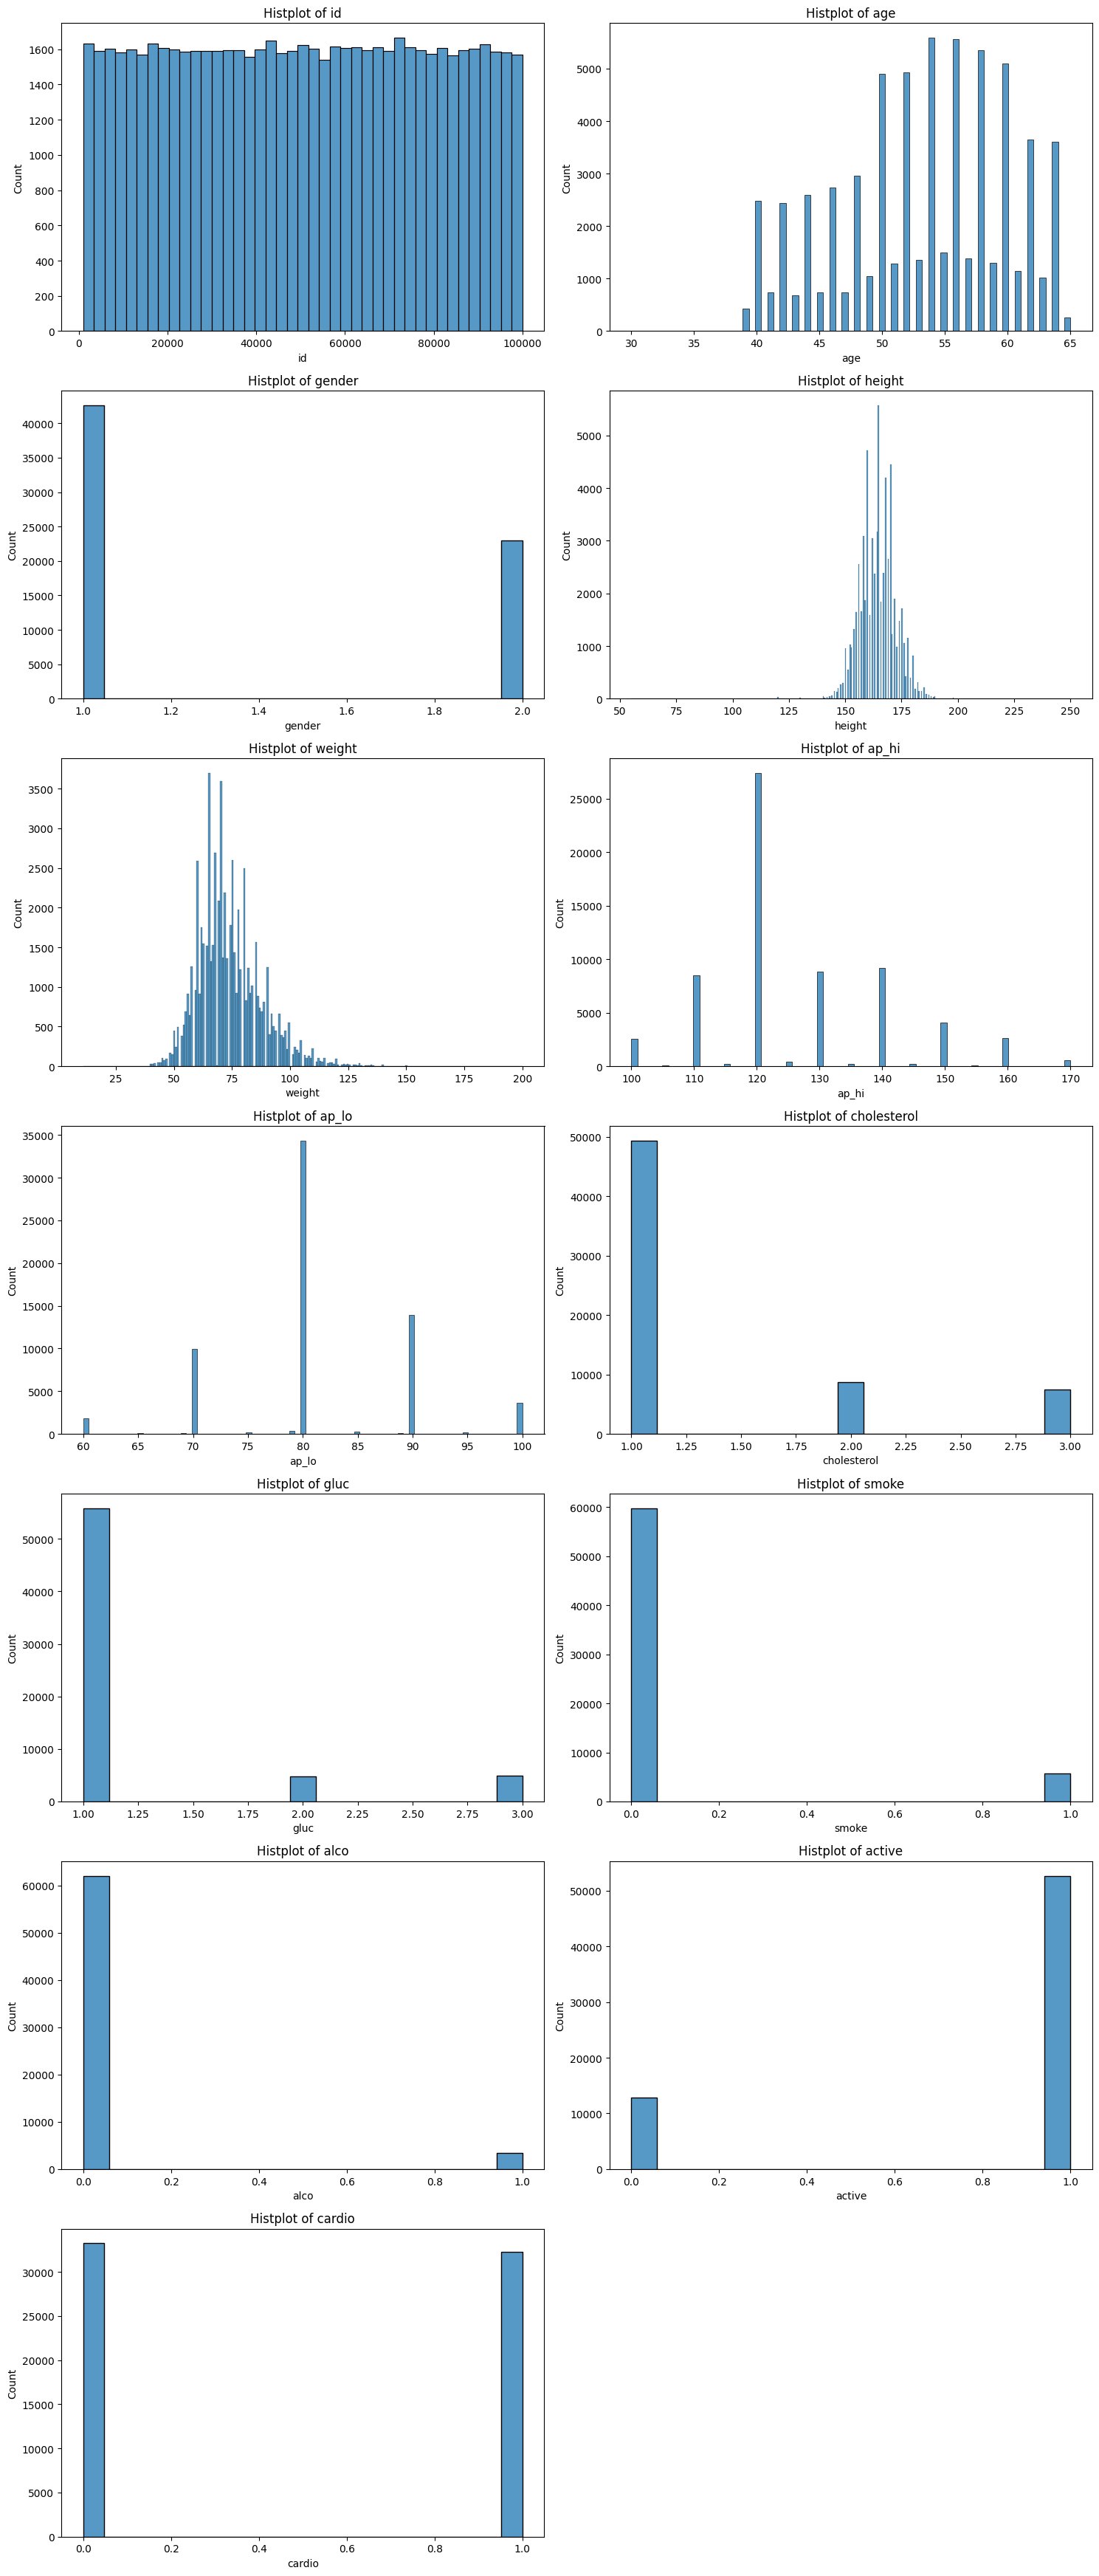

In [23]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1)//cols_per_row
plt.figure(figsize=(15, 5 * num_rows)) 
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  
    sns.histplot(data=df, x=col)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

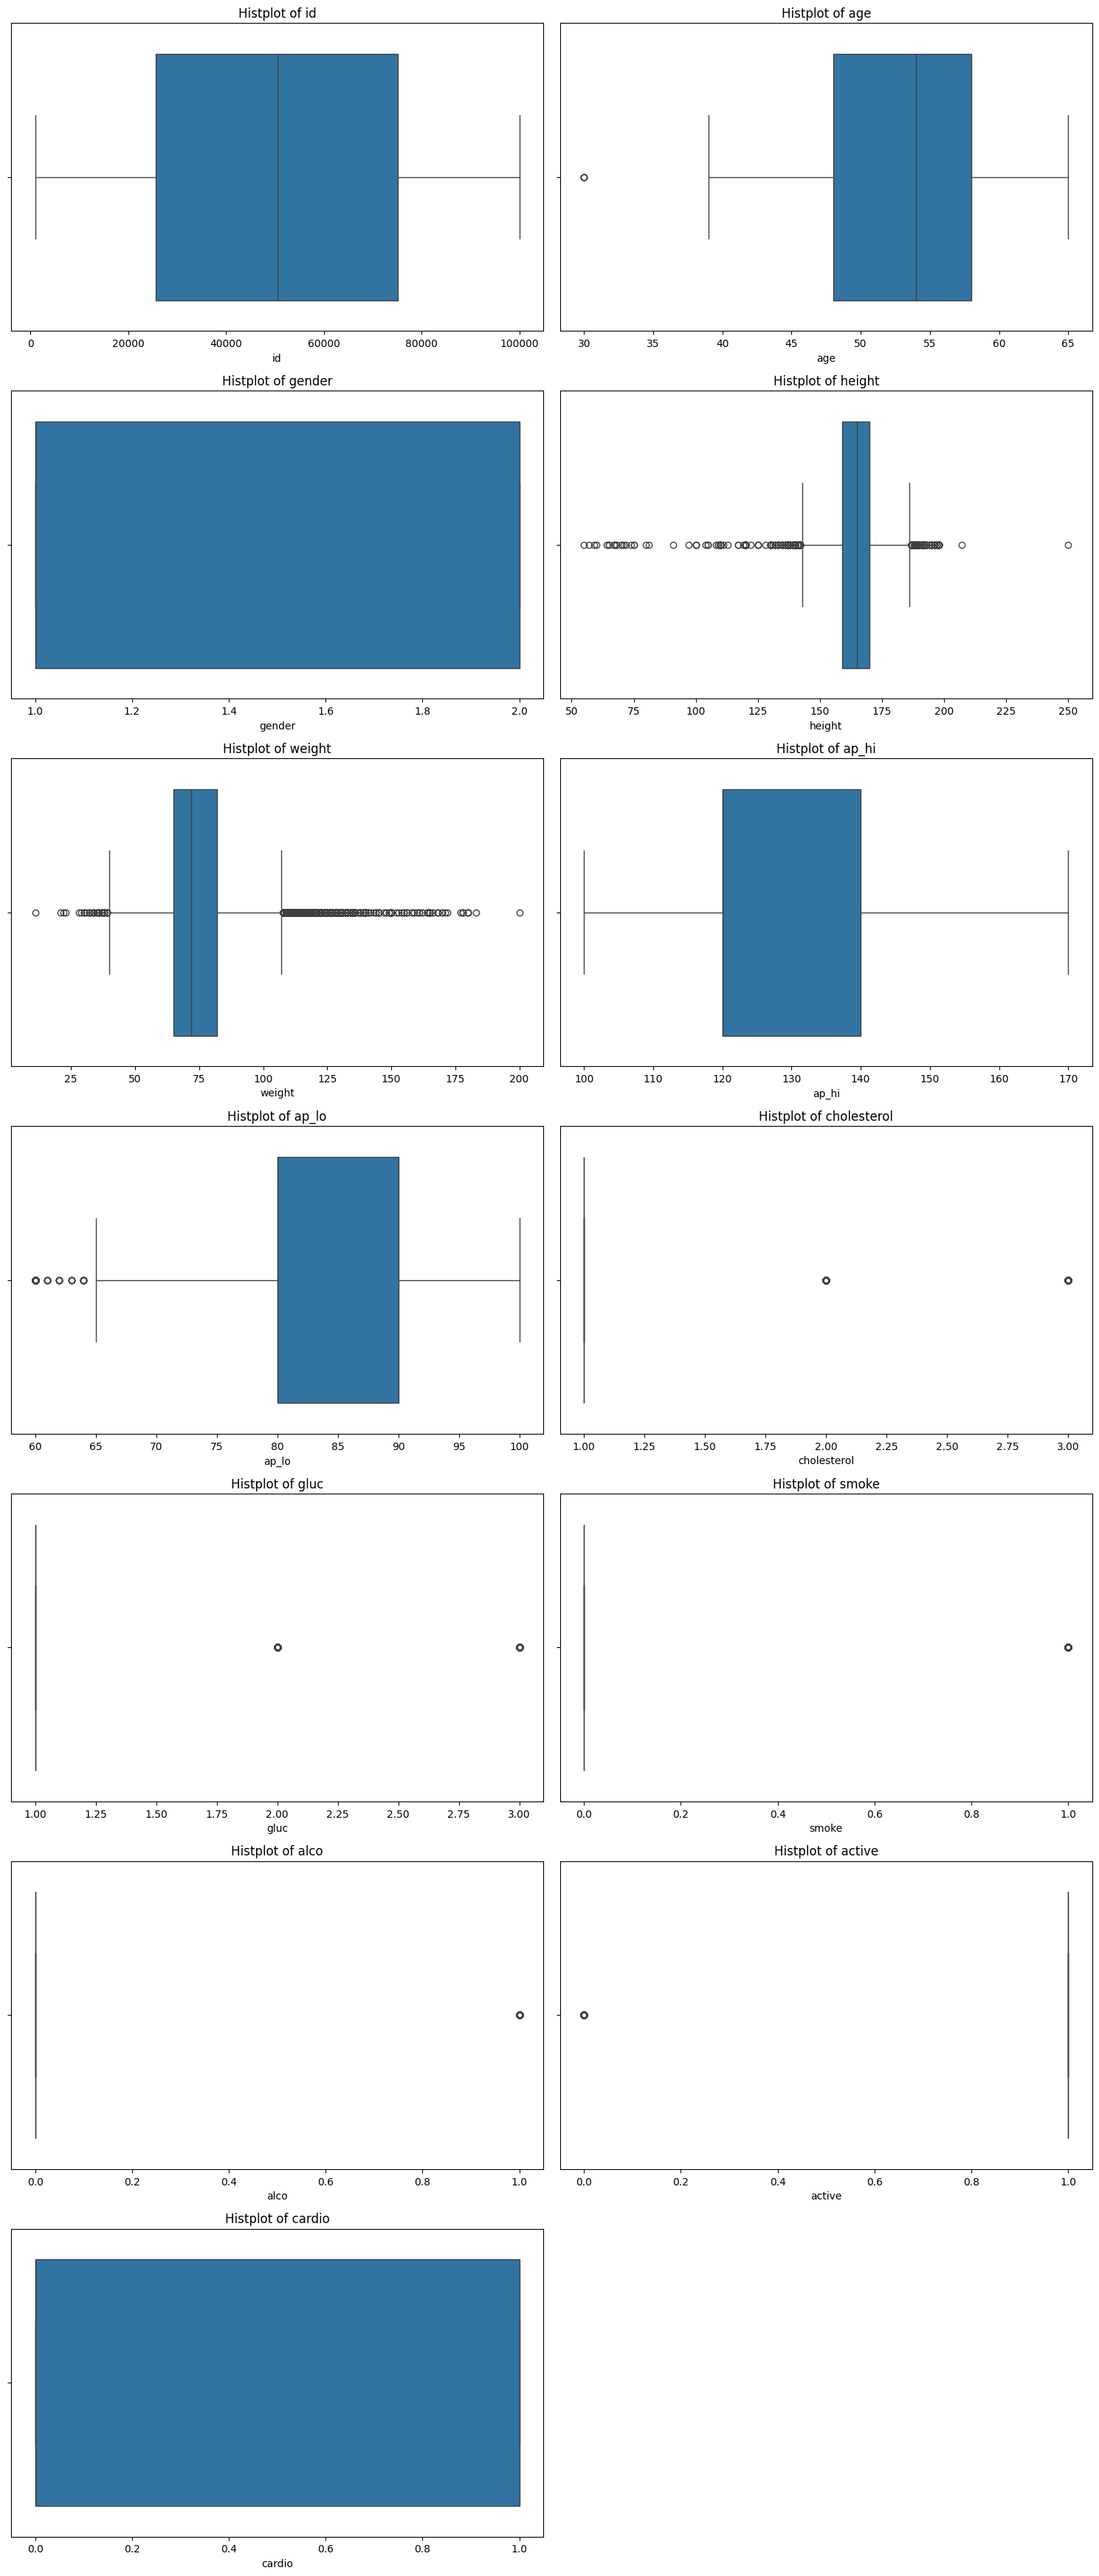

In [24]:
num_cols = len(df.columns)
cols_per_row = 2
num_rows = (num_cols + cols_per_row - 1) //2
plt.figure(figsize=(15, 5 * num_rows)) 
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, cols_per_row, i)  
    sns.boxplot(data=df, x=col)
    plt.title(f'Histplot of {col}')
plt.tight_layout()
plt.show()

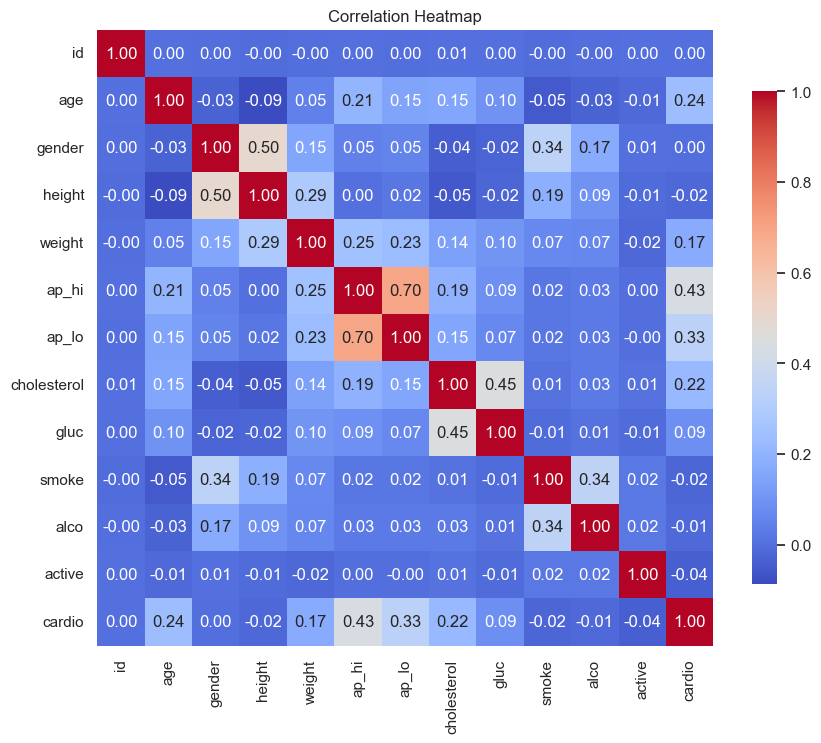

In [25]:
correlation_matrix = df.corr()
sns.set(style='white')
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df['cardio'].value_counts()

cardio
0    33236
1    32299
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import xgboost  as xgb 

df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)

df_test = df_test.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

x_test = df_test.drop(columns=['cardio'])
x_train = df_train.drop(columns=['cardio'])
x_val = df_val.drop(columns=['cardio'])

y_test = df_test['cardio'].values
y_train = df_train['cardio'].values
y_val = df_val['cardio'].values

del df_test['cardio']
del df_train['cardio']
del df_val['cardio']

features = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol', 'gluc', 'smoke', 'alco', 'active']

train_dicts = df_train[features].to_dict(orient='records')
val_dicts = df_val[features].to_dict(orient='records')

dv = DictVectorizer(sparse=True)
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

In [28]:
models = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(n_jobs=-1,random_state=42),
        'params':{
            'max_depth':[1,3,5,7,9,11],
            'n_estimators':[1,3,5,7,9]
        }
    },
    'AdaBoostClassifier':{
        'model':AdaBoostClassifier(random_state=42),
        'params':{
            'n_estimators':[1,3,5,7,9],
            'learning_rate':[0.1,0.01]
        }
    }, 
    'GradientClassifier':{
        'model':GradientBoostingClassifier(random_state=42),
        'params':{
            'max_depth':[1,3,5,7,9,11],
            'n_estimators':[1,3,5,7,9]
        }
    },
    'xgboost':{
        'model':xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'params':{
            'max_depth':[1,3,5,7,9,11,13,15,20],
            'learning_rate':[0.1,0.01]
        }
    }
}

results = []
def count_combinations(param_grid):
    from itertools import product
    return len(list(product(*param_grid.values())))

# Adjust n_iter based on the number of combinations
for model_name, model_params in models.items():
    num_combinations = count_combinations(model_params['params'])
    n_iter = min(50, num_combinations)  # Set n_iter to the smaller of 50 or the number of combinations

    randomized_search = RandomizedSearchCV(model_params['model'], model_params['params'],
                                           n_iter=n_iter,  # Use the adjusted n_iter
                                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
    randomized_search.fit(x_train, y_train)
    
    best_params = randomized_search.best_params_
    best_score = randomized_search.best_score_
    
    results.append({
        'model': model_name,
        'best accuracy': best_score,
        'best params': best_params
    })
results_df = pd.DataFrame(results)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\downloads\my_anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


D:\downloads\my_anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:52:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [29]:
results_df.sort_values(by='best accuracy',ascending=False)

,model,best accuracy,best params
3,xgboost,0.729178,"{'max_depth': 3, 'learning_rate': 0.1}"
2,GradientClassifier,0.726685,"{'n_estimators': 7, 'max_depth': 5}"
0,RandomForestClassifier,0.725388,"{'n_estimators': 9, 'max_depth': 9}"
1,AdaBoostClassifier,0.706722,"{'n_estimators': 1, 'learning_rate': 0.1}"


In [30]:
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import xgboost as xgb
import numpy as np
from sklearn.model_selection import ParameterSampler
param_dist = {
    'max_depth': range(10, 101, 10),
    'n_estimators': range(10, 201, 10),
    'learning_rate': [0.01, 0.1]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_jobs=-1, random_state=42, eval_metric='logloss')

# Create a list of parameter combinations
param_list = list(ParameterSampler(param_dist, n_iter=100, random_state=42))

# Initialize variables to track the best score and parameters
best_score = -np.inf
best_params = None

# Perform the search with tqdm progress bar
for params in tqdm(param_list, desc="Fitting models"):
    xgb_model.set_params(**params)
    xgb_model.fit(x_train, y_train)
    
    # Evaluate the model
    score = accuracy_score(y_val, xgb_model.predict(x_val))
    
    # Update best score and parameters
    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting models:   0%|          | 0/100 [00:00<?, ?it/s]

Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}
Best Score: 0.722896162355993


In [31]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
best_params = {'max_depth': 5,
               'learning_rate': 0.1}
xgb = xgb.XGBClassifier(**best_params,random_state=0)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_val)
accuracy = accuracy_score(y_val,y_pred)
rmse = np.sqrt(mean_squared_error(y_val,y_pred))
print(f"Test Accuracy: {accuracy}")
print(f"Test RMSE: {rmse}")

Test Accuracy: 0.7299153124284733
Test RMSE: 0.5196967265353195


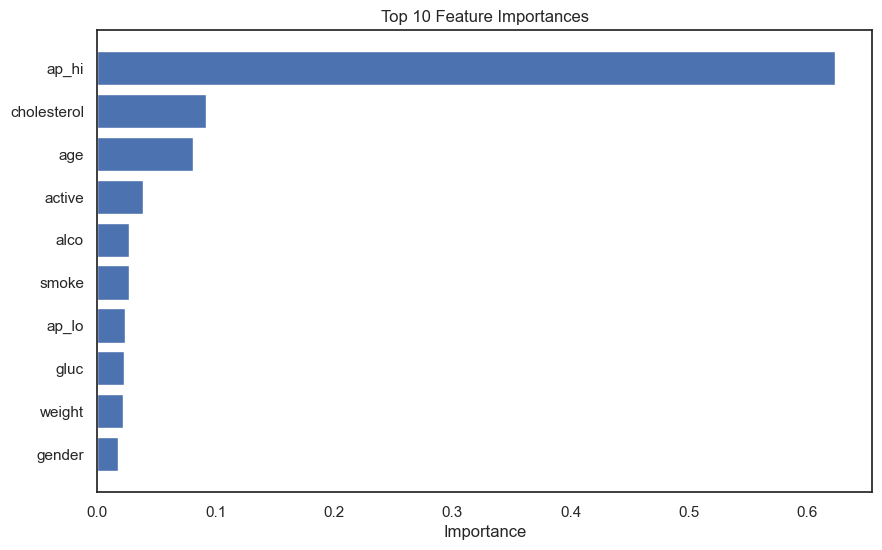

In [32]:
feature_importances = xgb.feature_importances_
feature_names = dv.get_feature_names_out()  
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = xgb.predict(x_val)
cm = confusion_matrix(y_val, y_pred)
cm

array([[5223, 1604],
       [1936, 4344]], dtype=int64)

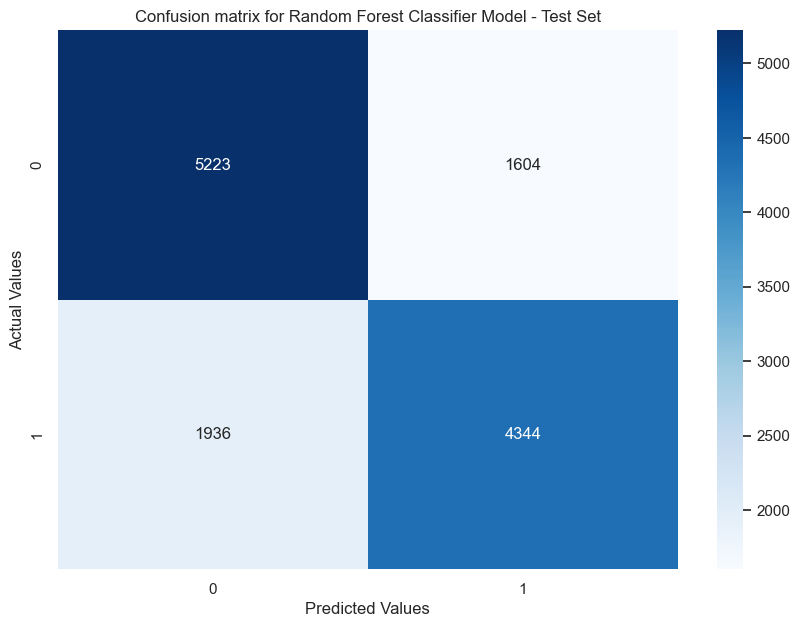

In [37]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [41]:
score = round(accuracy_score(y_val, y_pred),4)*100
print("Accuracy on val set: {}%".format(score))

Accuracy on val set: 49.309999999999995%


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2685, 3920],
       [1592, 4910]], dtype=int64)

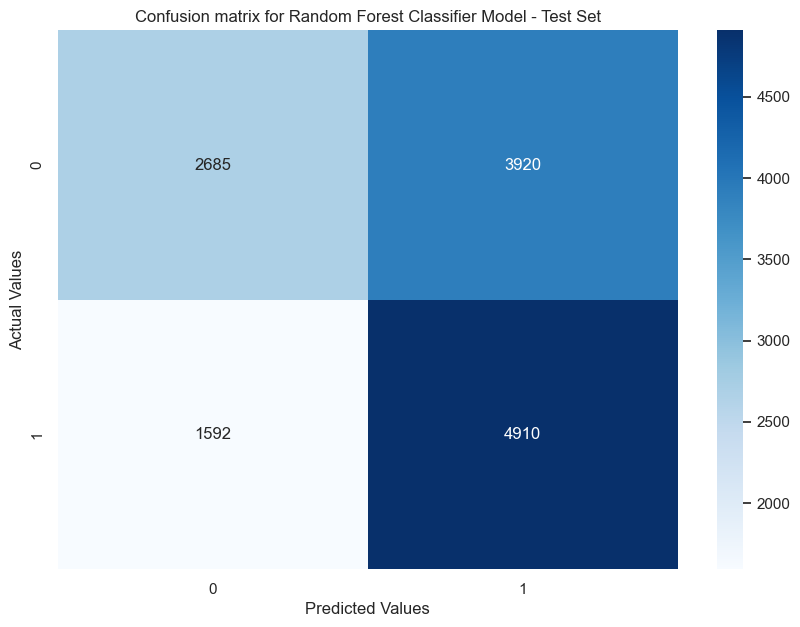

In [39]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [40]:
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 57.95%


In [42]:
train_dicts[0]

{'id': 14690,
 'age': 60,
 'gender': 1,
 'height': 165,
 'weight': 62.0,
 'ap_hi': 160,
 'ap_lo': 90,
 'cholesterol': 1,
 'gluc': 1,
 'smoke': 0,
 'alco': 0,
 'active': 1}

In [51]:
patient_data = {
  'id': 98424,
 'age': 17645,
 'gender': 2,
 'height': 168,
 'weight': 60.0,
 'ap_hi': 120,
 'ap_lo': 80,
 'cholesterol': 1,
 'gluc': 1,
 'smoke': 0,
 'alco': 0,
 'active': 1}

input_dicts = [train_dicts[0]]
inp_vectorized = dv.transform(input_dicts)
y_pred = xgb.predict_proba(inp_vectorized)


threshold = 0.5
if y_pred[0][1] > threshold: 
    predicted_accuracy = round(y_pred[0][1] * 100, 4)
    print(f"The patient is predicted to have cardiovascular disease. With predicted accuracy {predicted_accuracy}")
else:
    print("The patient is predicted not to have cardiovascular disease.")

The patient is predicted to have cardiovascular disease. With predicted accuracy 85.1701


In [30]:
df.loc[df['id']==98424]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
68193,98424,17645,2,168,60.0,120,80,1,1,0,0,1,1


In [29]:
train_dicts[0]

{'id': 98424,
 'age': 17645,
 'gender': 2,
 'height': 168,
 'weight': 60.0,
 'ap_hi': 120,
 'ap_lo': 80,
 'cholesterol': 1,
 'gluc': 1,
 'smoke': 0,
 'alco': 0,
 'active': 1}

In [46]:
y_pred[0][1]

0.85170054